# SHAP

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


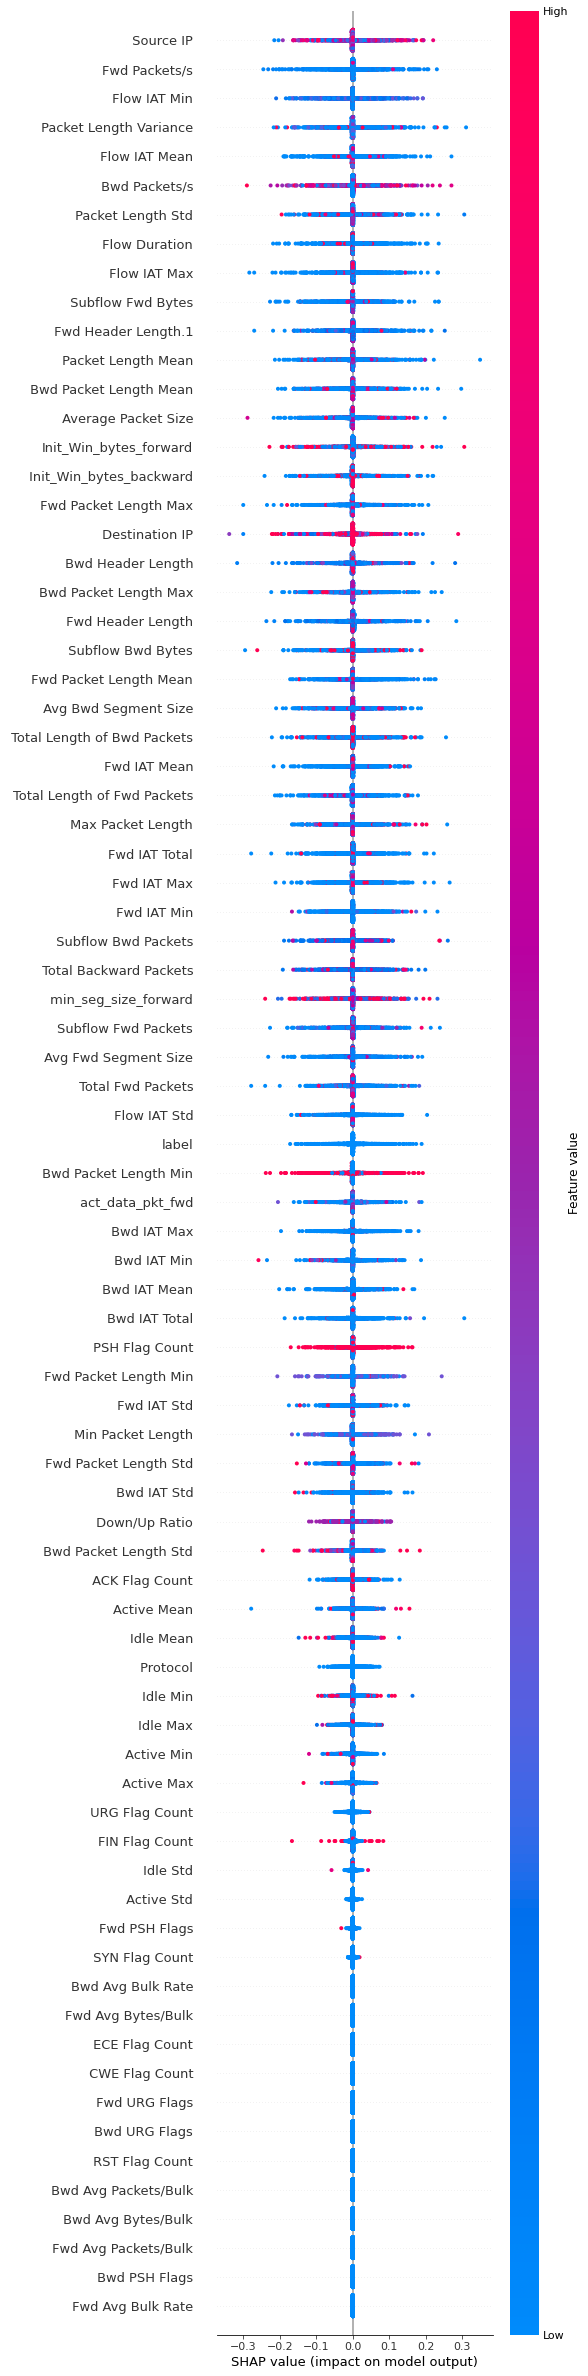

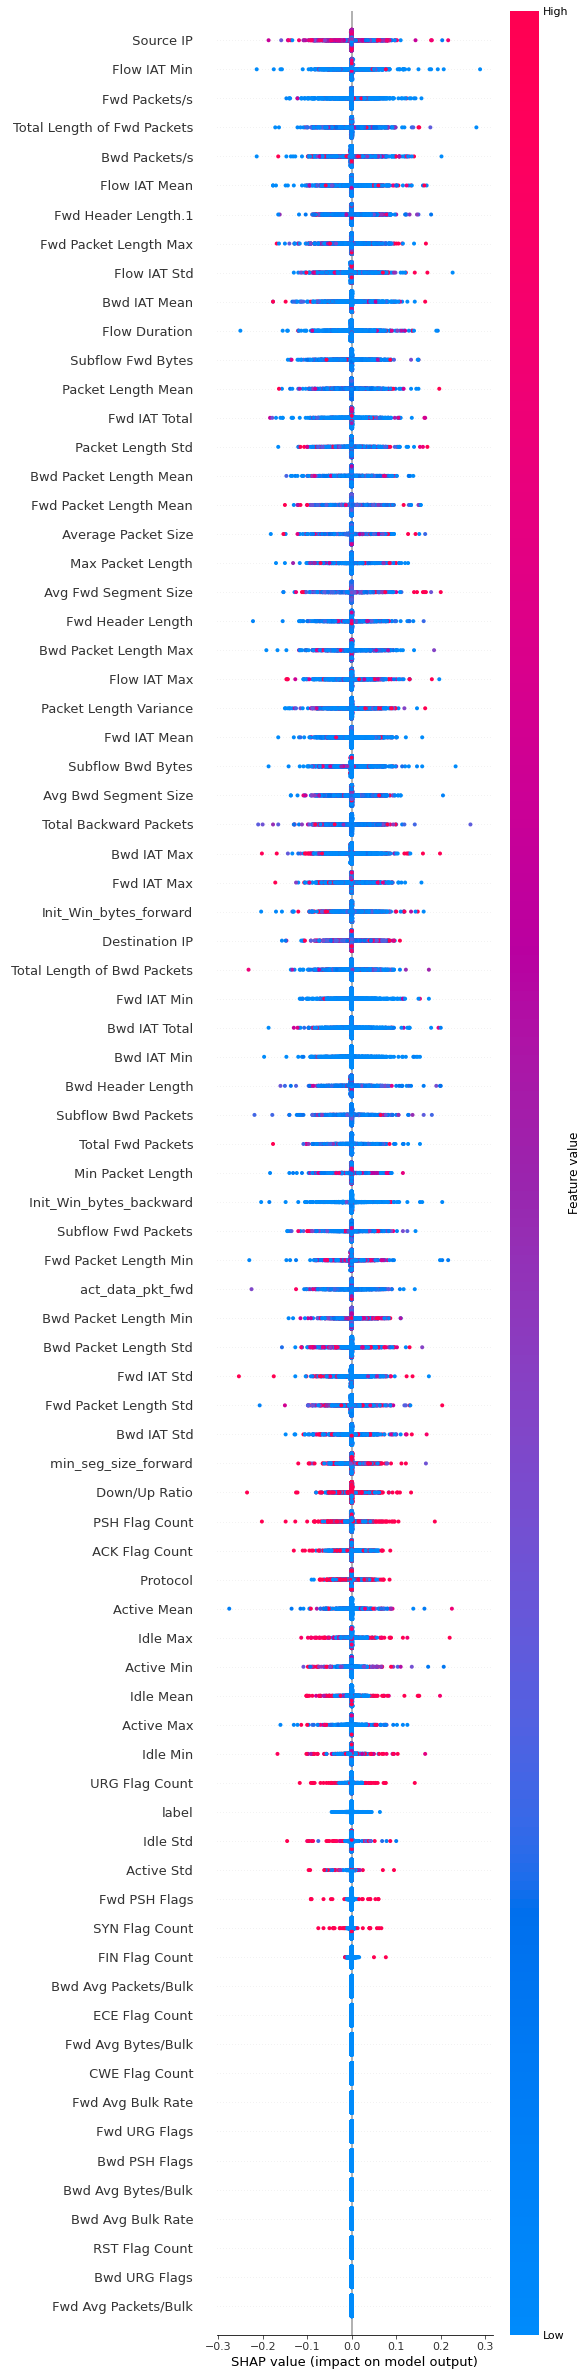

In [2]:
# With Permutation algorithm

import pandas as pd
import shap
import pickle
import matplotlib.pyplot as plt
import numpy as np


X_test = pd.read_csv('/home/ahmed/GNN-Based-ANIDS/GNN-Based-ANIDS/src/GNN_Model1/XP_CICIDS2017/XAI/SHAP_SAVED/Test_shap_feature_selection5000_x_train_linear.csv', encoding="ISO-8859–1", dtype = str)
X_test = X_test.apply(pd.to_numeric)
X_test = X_test.astype(float)

# print(X_test.dtypes.to_string())


# filename_expl = './src/GNN_Model1/XP_CICIDS2017/XAI/SHAP_SAVED/GNN_SHAP_explainer.sav'
filename = '/home/ahmed/GNN-Based-ANIDS/GNN-Based-ANIDS/src/GNN_Model1/XP_CICIDS2017/XAI/SHAP_SAVED/GNN_SHAP_shapvalues_shap_feature_selection5000_x_train_linear.sav'


# load_explainer = pickle.load(open(filename_expl, 'rb'))
# print(load_explainer)

label_column = X_test["label"]
attack_indx = []
benign_indx = []
for i, x in enumerate(label_column):
    if (x == 1.0):
        attack_indx.append(i)
    elif (x == 0.0):
        benign_indx.append(i)

load_shap_values = pickle.load(open(filename, 'rb'))

shap.summary_plot(load_shap_values[attack_indx], feature_names = X_test.columns, max_display=X_test.shape[1])
shap.summary_plot(load_shap_values[benign_indx], feature_names = X_test.columns, max_display=X_test.shape[1])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


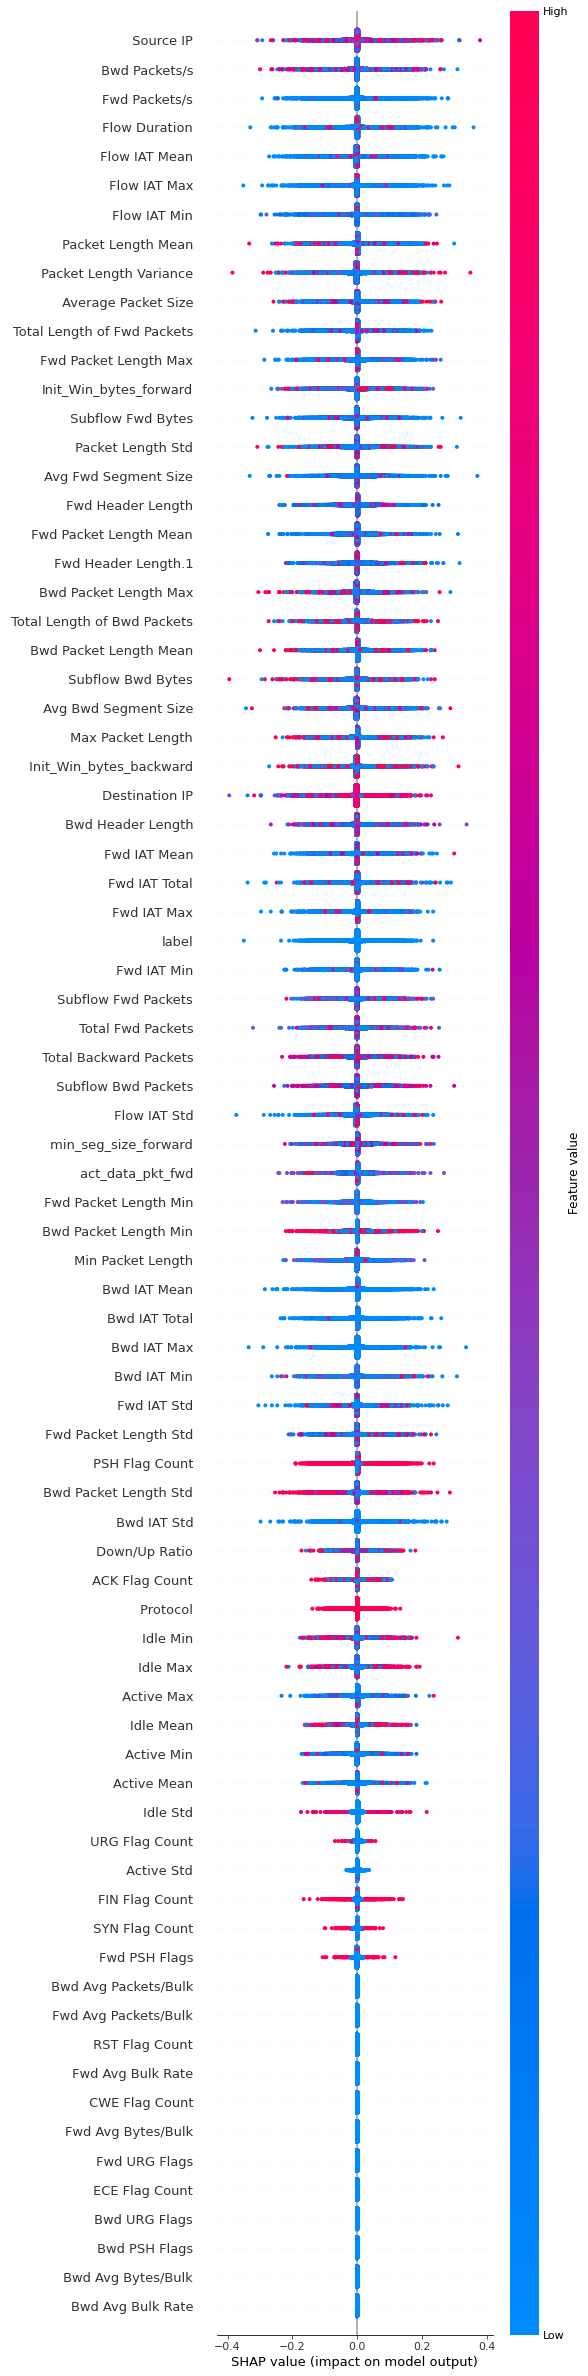

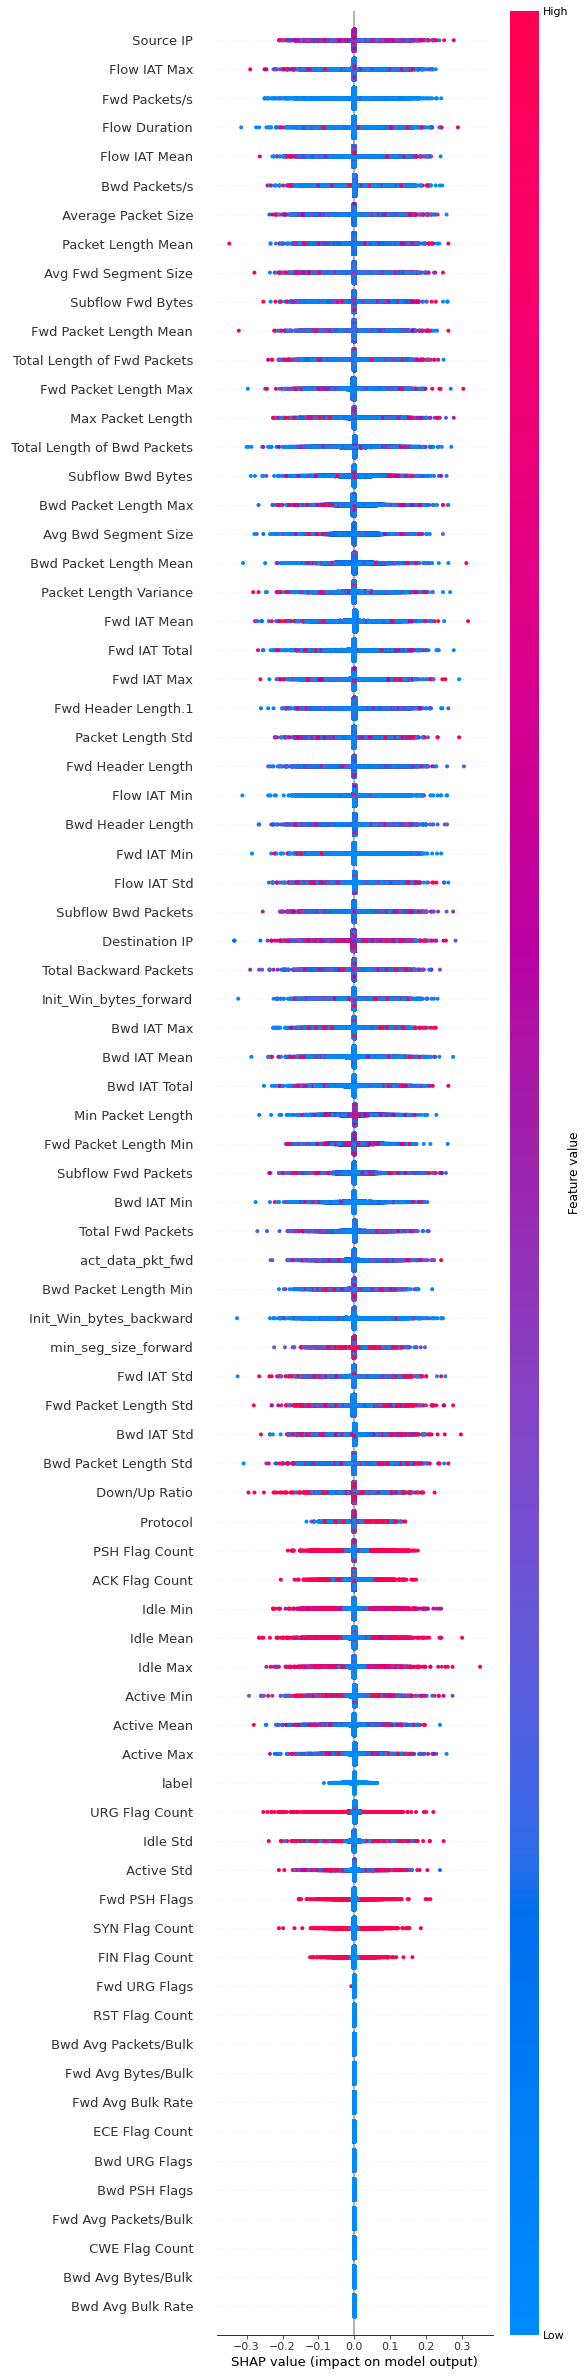

In [52]:
import pandas as pd
import shap
import pickle
import matplotlib.pyplot as plt
import numpy as np


X_test = pd.read_csv('/home/ahmed/GNN-Based-ANIDS/GNN-Based-ANIDS/src/GNN_Model1/XP_CICIDS2017/XAI/SHAP_SAVED/Test_all.csv', encoding="ISO-8859–1", dtype = str)
X_test = X_test.apply(pd.to_numeric)
X_test = X_test.astype(float)

# print(X_test.dtypes.to_string())


# filename_expl = './src/GNN_Model1/XP_CICIDS2017/XAI/SHAP_SAVED/GNN_SHAP_explainer.sav'
filename = '/home/ahmed/GNN-Based-ANIDS/GNN-Based-ANIDS/src/GNN_Model1/XP_CICIDS2017/XAI/SHAP_SAVED/GNN_SHAP_shapvalues_all.sav'


# load_explainer = pickle.load(open(filename_expl, 'rb'))
# print(load_explainer)

label_column = X_test["label"]
attack_indx = []
benign_indx = []
for i, x in enumerate(label_column):
    if (x == 1.0):
        attack_indx.append(i)
    elif (x == 0.0):
        benign_indx.append(i)

load_shap_values = pickle.load(open(filename, 'rb'))

shap.summary_plot(load_shap_values[attack_indx], feature_names = X_test.columns, max_display=X_test.shape[1])
shap.summary_plot(load_shap_values[benign_indx], feature_names = X_test.columns, max_display=X_test.shape[1])

In [69]:
# Feature importance
print("Avg shapley values for intrusions :")
print(np.sum(np.abs(load_shap_values[attack_indx].values), axis=0) / len(attack_indx))
print()
feature_order_attack = np.argsort(np.sum(np.abs(load_shap_values[attack_indx].values), axis=0))
print([X_test.columns[i] for i in feature_order_attack][::-1])

print()
print("**********")
print()

print("Avg shapley values for bengin :")
print(np.sum(np.abs(load_shap_values[benign_indx].values), axis=0) / len(benign_indx))
print()
feature_order_benign = np.argsort(np.sum(np.abs(load_shap_values[benign_indx].values), axis=0))
print([X_test.columns[i] for i in feature_order_benign][::-1])

Avg shapley values for intrusions :
[0.01087603 0.01526609 0.01540351 0.00761305 0.01069569 0.01579855
 0.01591626 0.01632101 0.01373181 0.01705698 0.01035427 0.01199902
 0.         0.01213003 0.0168008  0.01650997 0.00148333 0.00751466
 0.00815115 0.         0.01576221 0.0117672  0.01370348 0.00237694
 0.00776591 0.0031143  0.         0.01227532 0.01436392 0.01448252
 0.01381666 0.01382443 0.01448396 0.01485565 0.00765582 0.00772055
 0.00267912 0.01564485 0.01027848 0.01685333 0.         0.00791185
 0.         0.0153588  0.         0.01526564 0.00193992 0.0157396
 0.01541506 0.01614177 0.01505611 0.01638714 0.         0.01382881
 0.00863148 0.         0.01180927 0.         0.01294611 0.01580916
 0.01209592 0.01787909 0.01642573 0.01500383 0.01561298 0.01657834
 0.00147636 0.01151187 0.         0.01577142 0.         0.
 0.00746472 0.01277955 0.01524886 0.01244471 0.01206176 0.01559366
 0.01384499]

[' Source IP', ' Bwd Packets/s', 'Fwd Packets/s', ' Flow Duration', ' Flow IAT Mean', ' 

## Scatter Plots
For attacks intances (the rank for benign instances) :
1. Bwd Packets/s ................. (5) -
2. Fwd Packets/s ................. (2)
3. Flow Duration ................. (3)
4. Flow IAT Mean ................. (4)
5. Flow IAT Max .................. (1) +
6. Flow IAT Min .................. (26) -
7. Packet Length Mean ............ (7)
8. Packet Length Variance ........ (19) -
9. Average Packet Size ........... (6) +
10. Total Length of Fwd Packets .. (11) -

For benign intances (the rank for attacks instances) :
1. Flow IAT Max ................. (5) -
2. Fwd Packets/s ................ (2)
3. Flow Duration ................ (3)
4. Flow IAT Mean ................ (4)
5. Bwd Packets/s ................ (1) +
6. Average Packet Size .......... (9) -
7. Packet Length Mean ........... (7)
8. Avg Fwd Segment Size ......... (15) -
9. Subflow Fwd Bytes ............ (13) -
10. Fwd Packet Length Mean ...... (17) -

## Interpretation on "Bwd Packets/s" for both Benign & Intrusion instances

.values =
array([ 0.        , -0.025     , -0.04666667, ...,  0.01833333,
        0.        ,  0.03166667])

.base_values =
array([0.  , 0.19, 0.  , ..., 0.42, 0.  , 0.  ])

.data =
array([6.98110630e-02, 2.32558139e+04, 8.73785610e-02, ...,
       2.27272727e+04, 0.00000000e+00, 1.00000000e+04])


(-10000.0, 2010000.0)

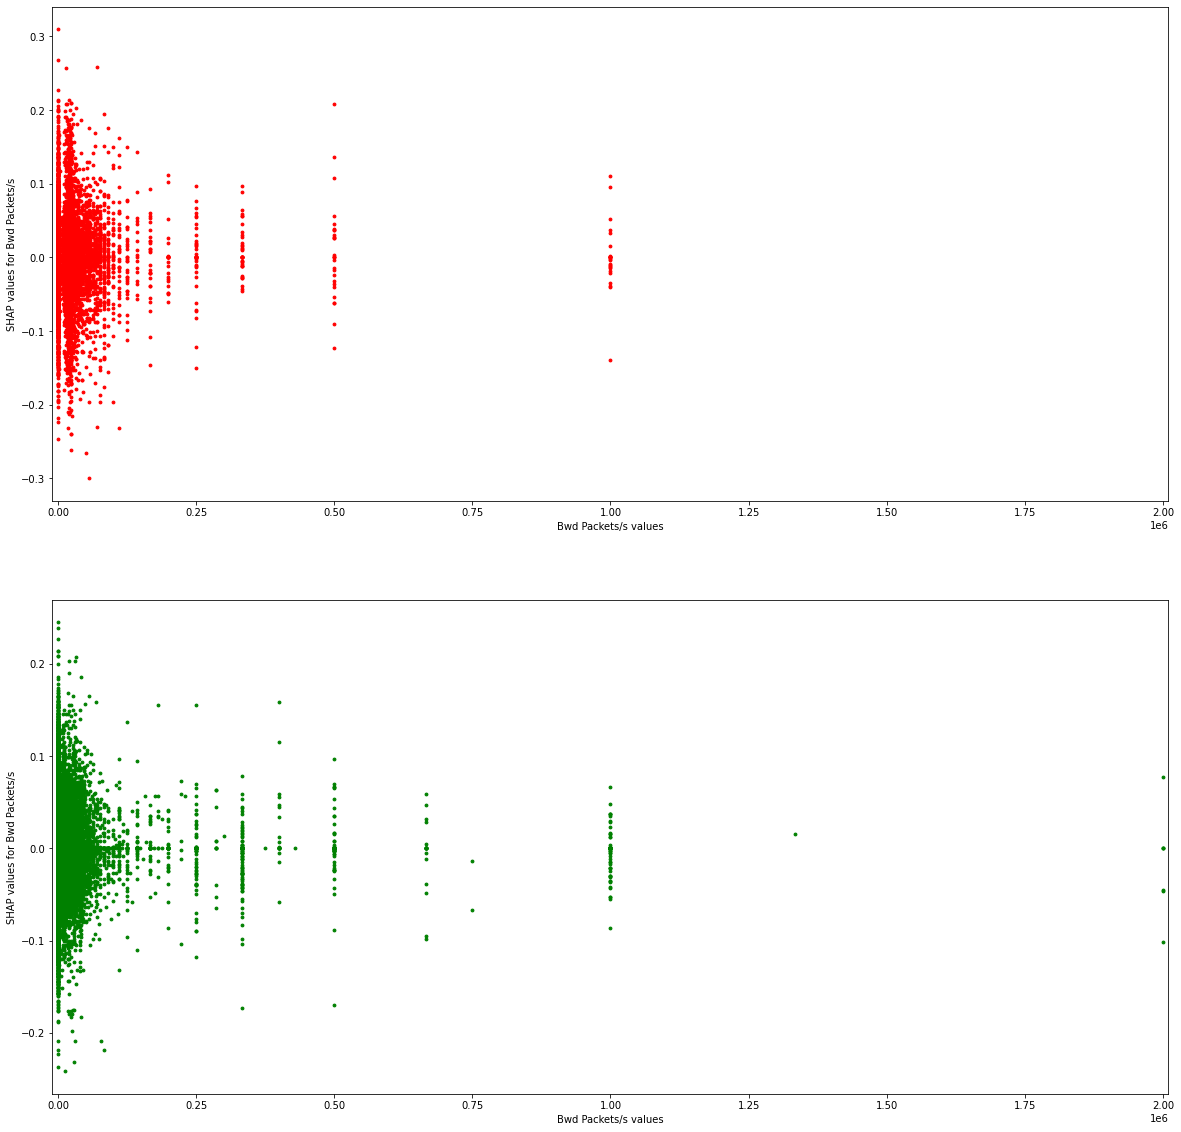

In [3]:
print(load_shap_values[attack_indx," Bwd Packets/s"])

# shap.plots.scatter(load_shap_values[attack_indx," Bwd Packets/s"], color = "r")
# shap.plots.scatter(load_shap_values[benign_indx," Bwd Packets/s"], color = "g")

import matplotlib.pyplot as plt

# data = edge features
# values = shap values

fig, ax = plt.subplots(2, figsize=(20, 20))
ax[0].scatter(load_shap_values[attack_indx," Bwd Packets/s"].data, load_shap_values[attack_indx," Bwd Packets/s"].values, color = "r", marker = "o", s = 8)
ax[0].set_xlabel("Bwd Packets/s values")
ax[0].set_ylabel("SHAP values for Bwd Packets/s")
ax[0].set_xlim([-10000, max(max(load_shap_values[attack_indx," Bwd Packets/s"].data), max(load_shap_values[benign_indx," Bwd Packets/s"].data))+10000])

ax[1].scatter(load_shap_values[benign_indx," Bwd Packets/s"].data, load_shap_values[benign_indx," Bwd Packets/s"].values, color = "g", marker = "o", s = 8)
ax[1].set_xlabel("Bwd Packets/s values")
ax[1].set_ylabel("SHAP values for Bwd Packets/s")
ax[1].set_xlim([-10000, max(max(load_shap_values[attack_indx," Bwd Packets/s"].data), max(load_shap_values[benign_indx," Bwd Packets/s"].data))+10000])

(-1000.0, 20000.0)

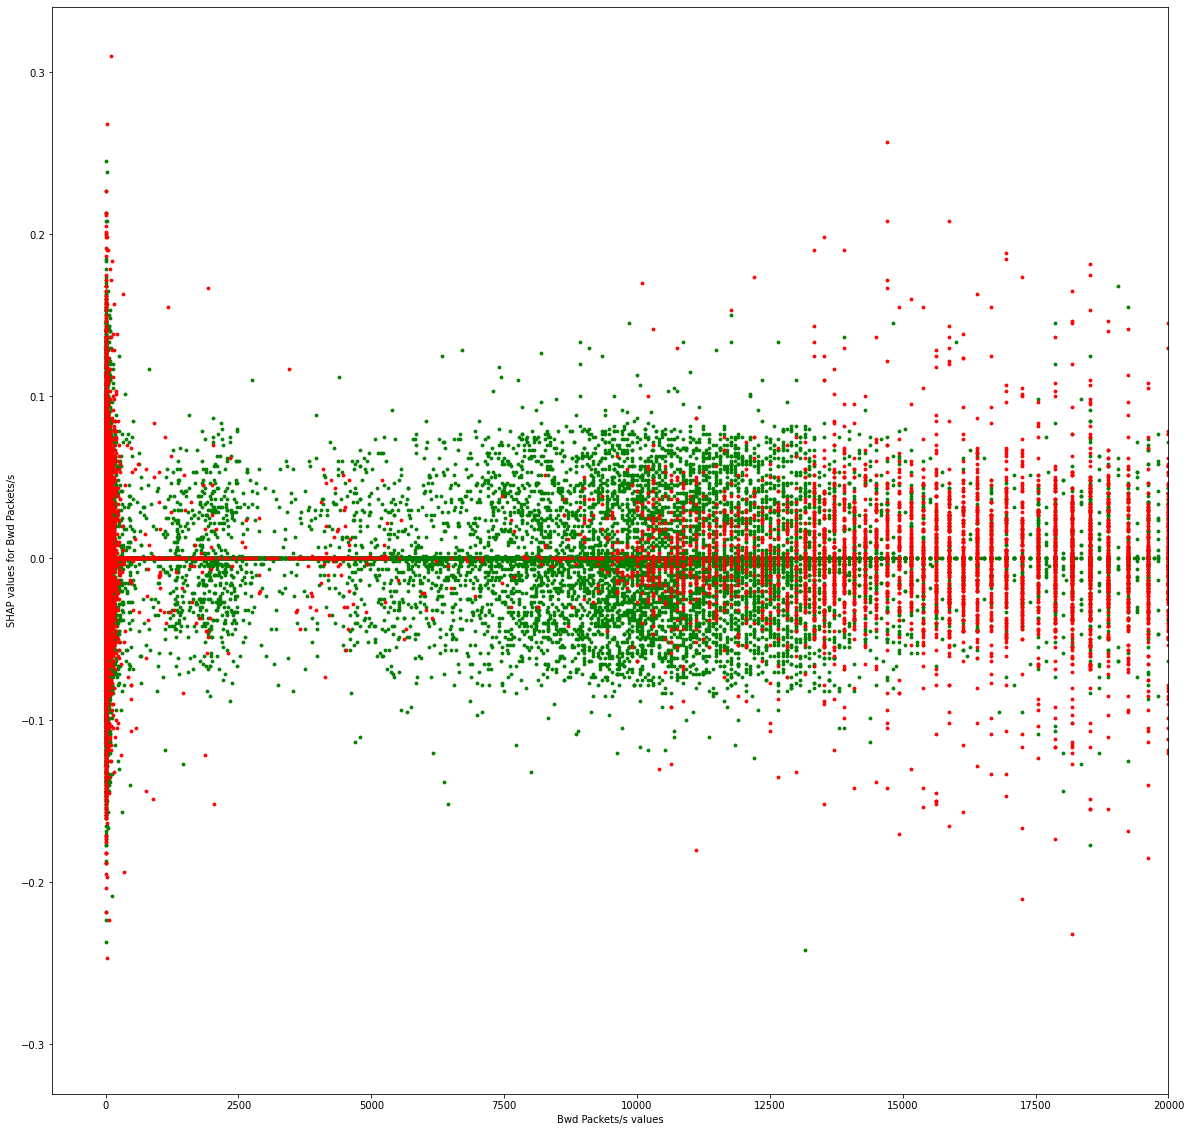

In [4]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.scatter(load_shap_values[benign_indx," Bwd Packets/s"].data, load_shap_values[benign_indx," Bwd Packets/s"].values, color = "g", marker = "o", s = 8)
ax.scatter(load_shap_values[attack_indx," Bwd Packets/s"].data, load_shap_values[attack_indx," Bwd Packets/s"].values, color = "r", marker = "o", s = 8)
ax.set_xlabel("Bwd Packets/s values")
ax.set_ylabel("SHAP values for Bwd Packets/s")
ax.set_xlim([-1000, max(max(load_shap_values[attack_indx," Bwd Packets/s"].data), max(load_shap_values[benign_indx," Bwd Packets/s"].data))*0.01])

## Interpretation on "Flow IAT Max" for both Benign & Intrusion instances

(-1000000.0, 121000000.0)

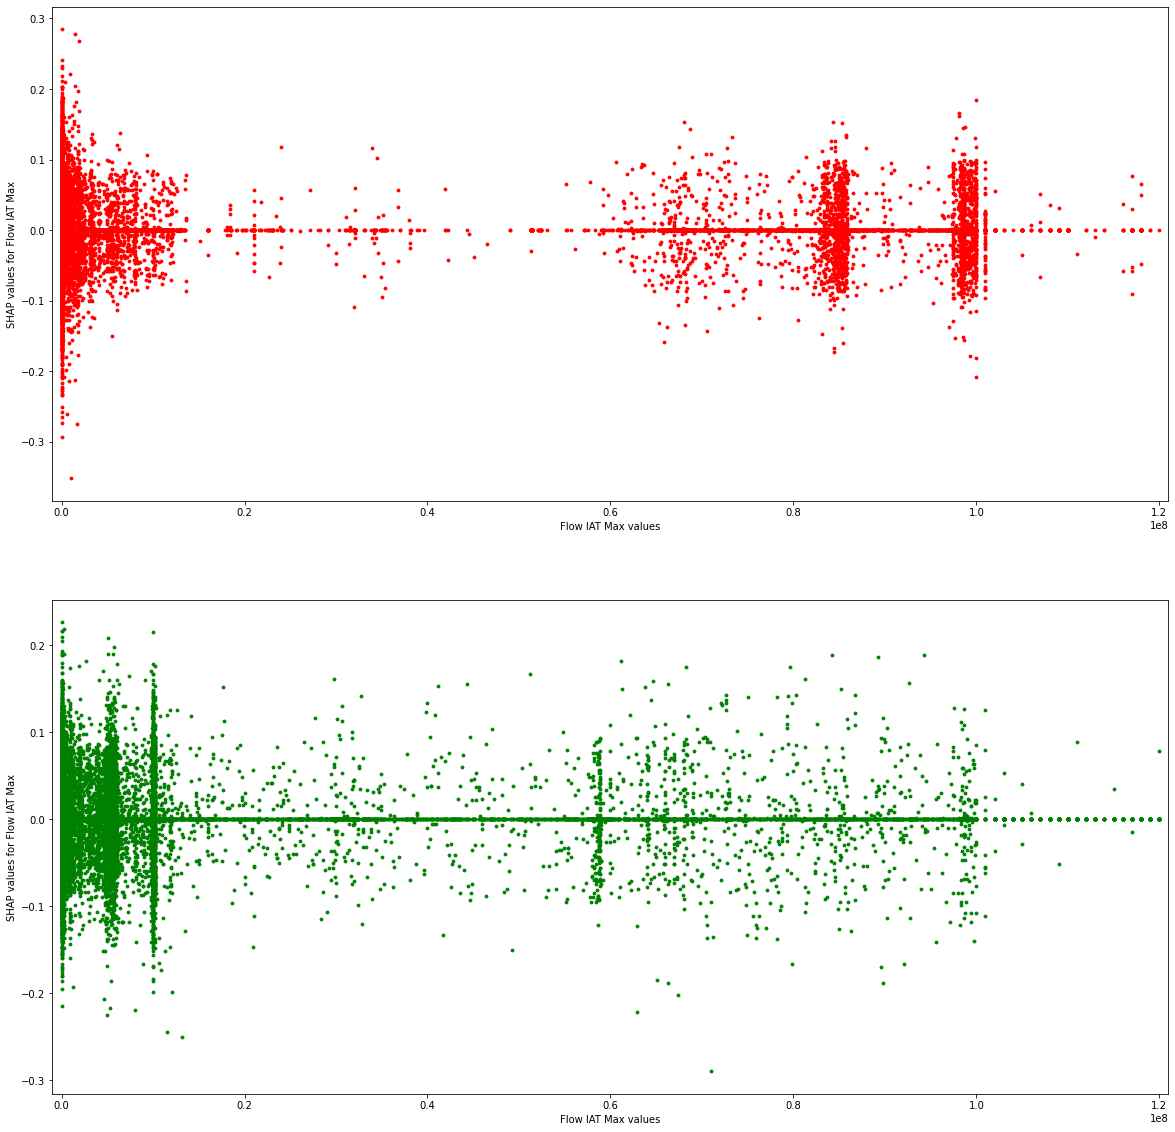

In [5]:
fig, ax = plt.subplots(2, figsize=(20, 20))
ax[0].scatter(load_shap_values[attack_indx," Flow IAT Max"].data, load_shap_values[attack_indx," Flow IAT Max"].values, color = "r", marker = "o", s = 8)
ax[0].set_xlabel("Flow IAT Max values")
ax[0].set_ylabel("SHAP values for Flow IAT Max")
ax[0].set_xlim([-1000000, max(max(load_shap_values[attack_indx," Flow IAT Max"].data), max(load_shap_values[benign_indx," Flow IAT Max"].data))+1000000])

ax[1].scatter(load_shap_values[benign_indx," Flow IAT Max"].data, load_shap_values[benign_indx," Flow IAT Max"].values, color = "g", marker = "o", s = 8)
ax[1].set_xlabel("Flow IAT Max values")
ax[1].set_ylabel("SHAP values for Flow IAT Max")
ax[1].set_xlim([-1000000, max(max(load_shap_values[attack_indx," Flow IAT Max"].data), max(load_shap_values[benign_indx," Flow IAT Max"].data))+1000000])

(80000000.0, 110000000.0)

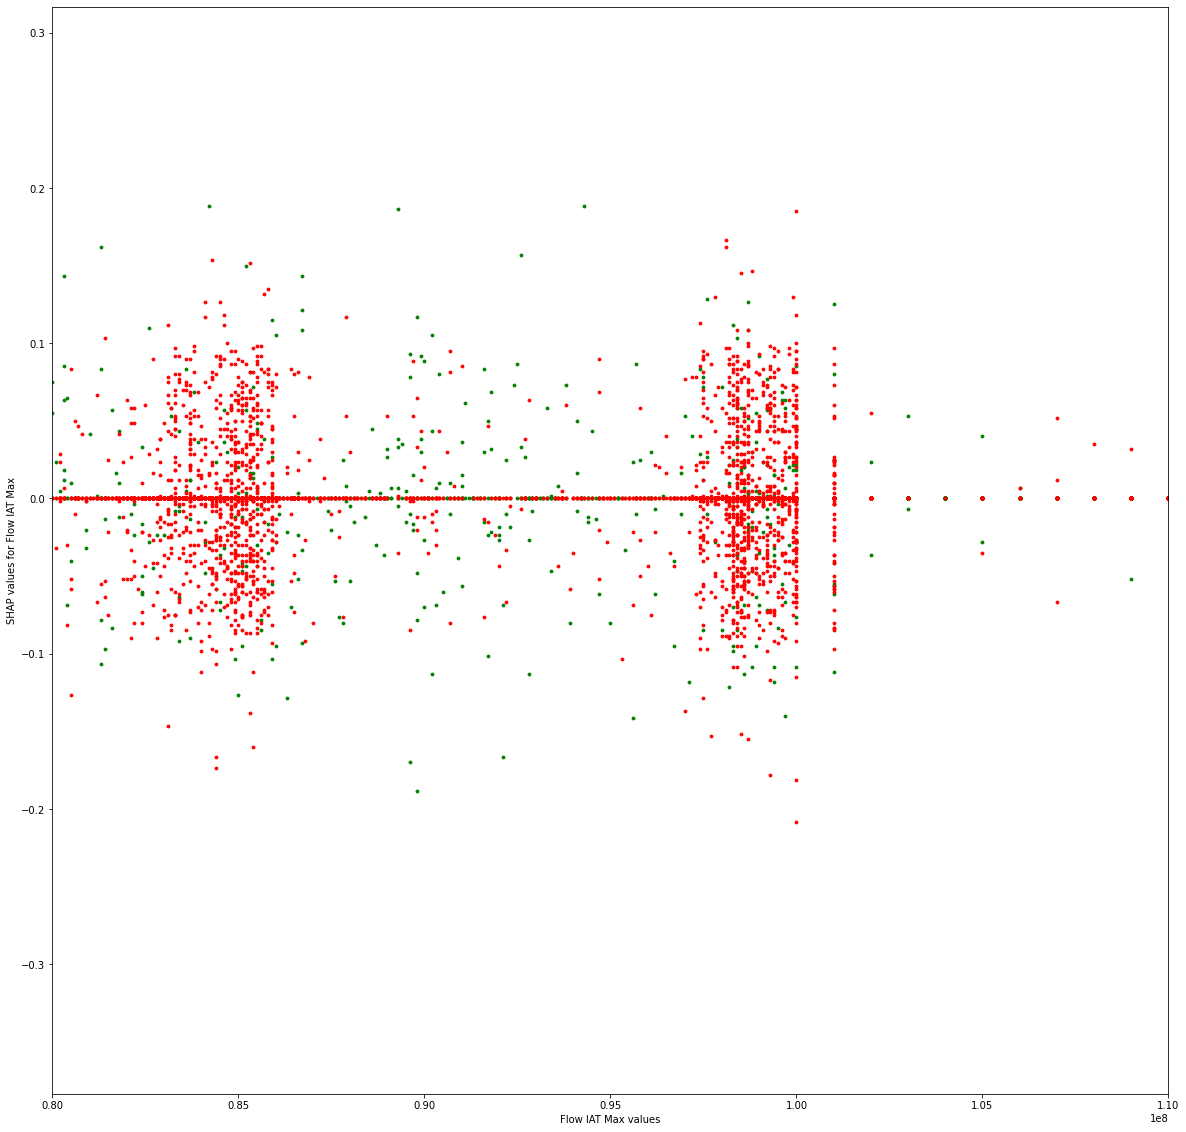

In [6]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.scatter(load_shap_values[benign_indx," Flow IAT Max"].data, load_shap_values[benign_indx," Flow IAT Max"].values, color = "g", marker = "o", s = 8)
ax.scatter(load_shap_values[attack_indx," Flow IAT Max"].data, load_shap_values[attack_indx," Flow IAT Max"].values, color = "r", marker = "o", s = 8)
ax.set_xlabel("Flow IAT Max values")
ax.set_ylabel("SHAP values for Flow IAT Max")
ax.set_xlim([80000000, 110000000])

(-1000000.0, 15000000.0)

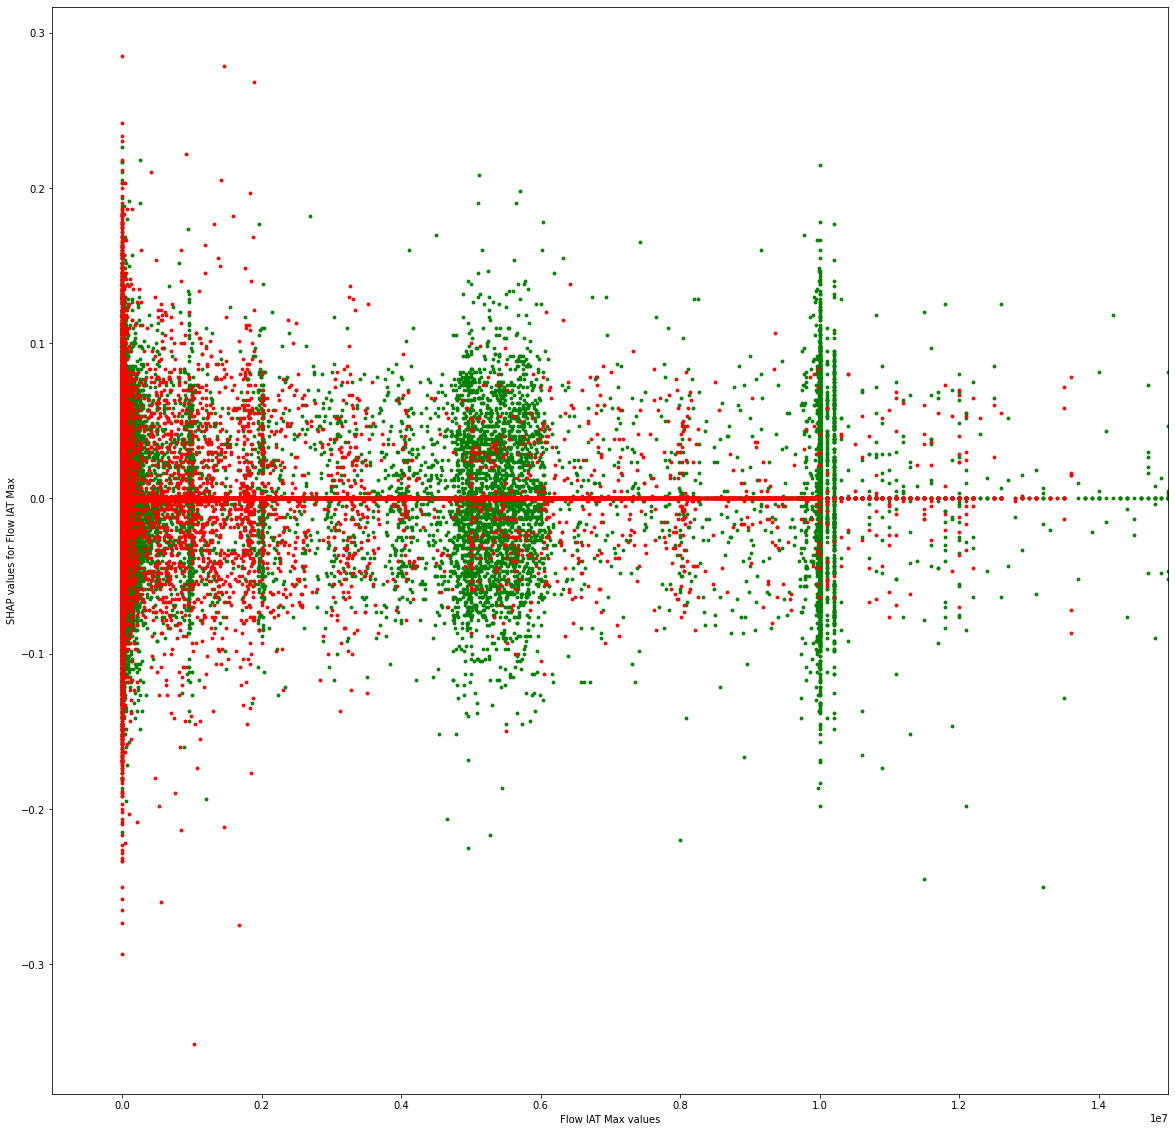

In [7]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.scatter(load_shap_values[benign_indx," Flow IAT Max"].data, load_shap_values[benign_indx," Flow IAT Max"].values, color = "g", marker = "o", s = 8)
ax.scatter(load_shap_values[attack_indx," Flow IAT Max"].data, load_shap_values[attack_indx," Flow IAT Max"].values, color = "r", marker = "o", s = 8)
ax.set_xlabel("Flow IAT Max values")
ax.set_ylabel("SHAP values for Flow IAT Max")
ax.set_xlim([-1000000, 15000000])

# Detailed interpretation on large ranking difference

### Flow IAT Min (6th in intrusions & 26th in benign)

(-10000.0, 150000.0)

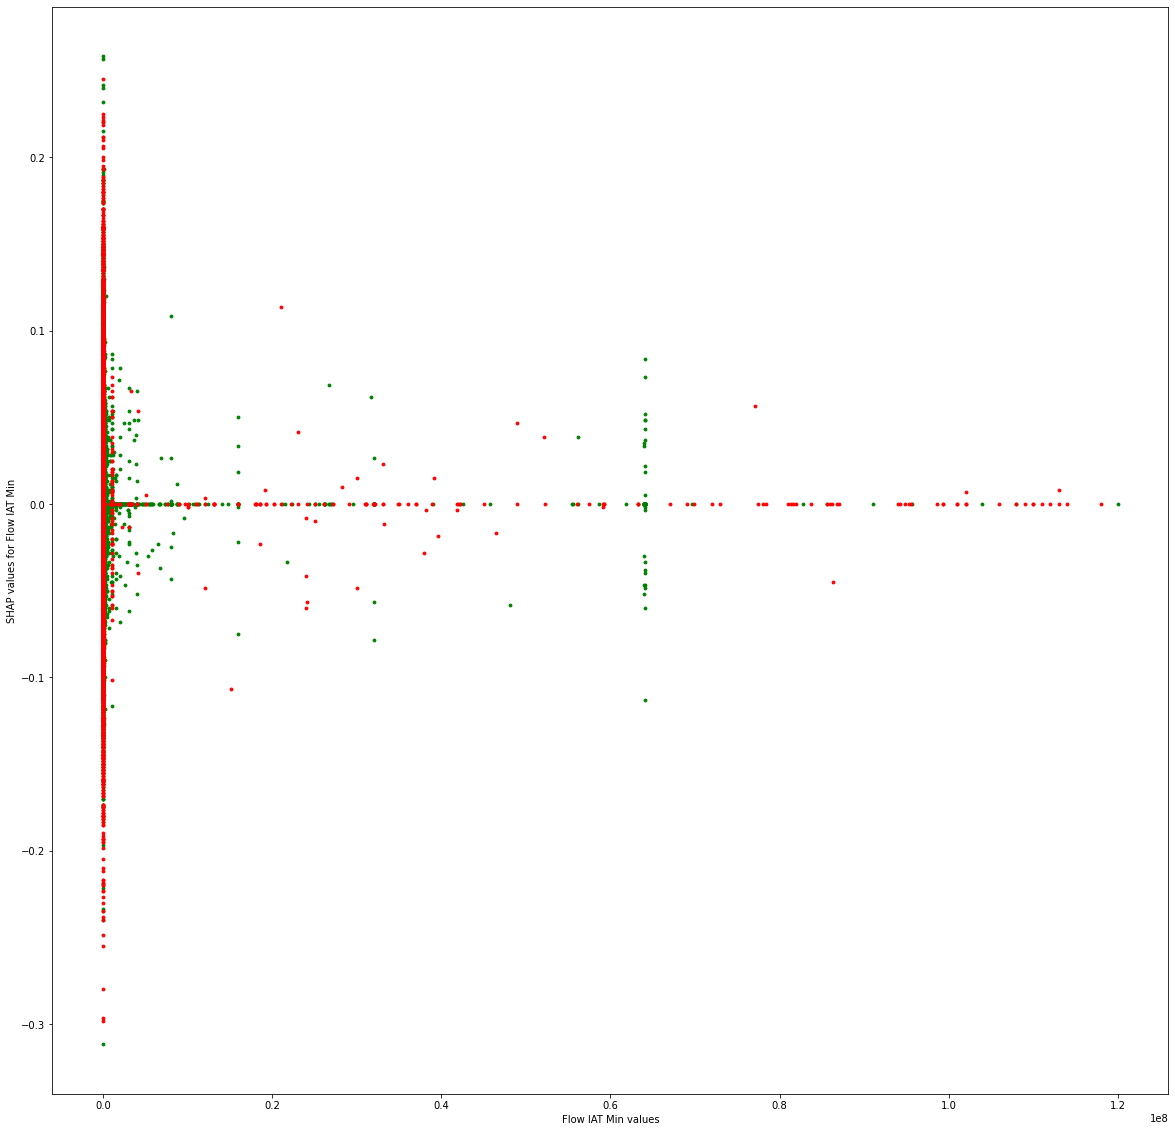

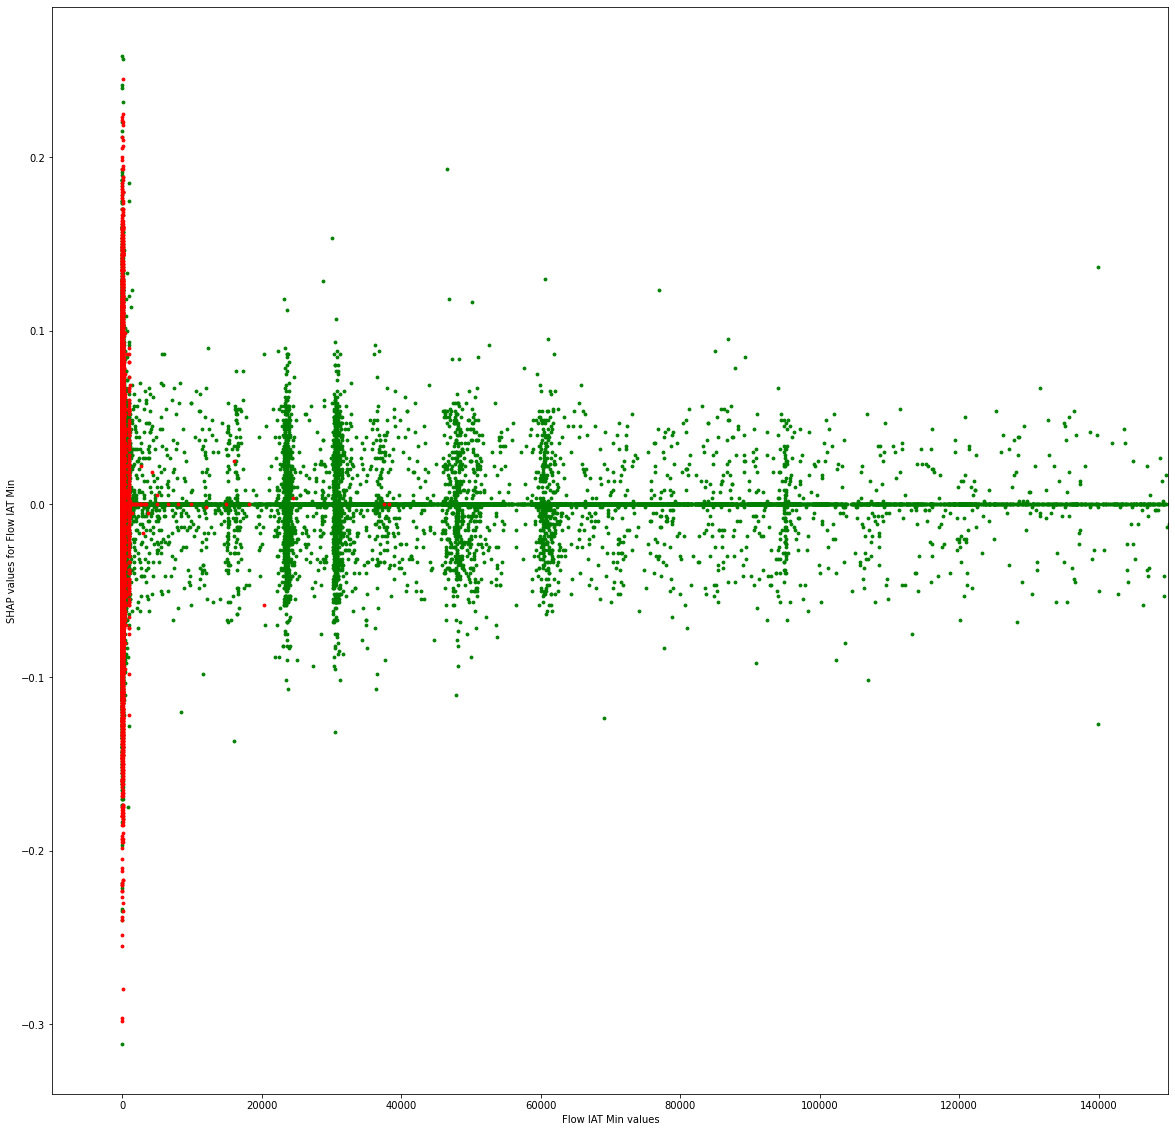

In [50]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.scatter(load_shap_values[benign_indx," Flow IAT Min"].data, load_shap_values[benign_indx," Flow IAT Min"].values, color = "g", marker = "o", s = 8)
ax.scatter(load_shap_values[attack_indx," Flow IAT Min"].data, load_shap_values[attack_indx," Flow IAT Min"].values, color = "r", marker = "o", s = 8)
ax.set_xlabel("Flow IAT Min values")
ax.set_ylabel("SHAP values for Flow IAT Min")

fig, ax = plt.subplots(figsize=(20, 20))
ax.scatter(load_shap_values[benign_indx," Flow IAT Min"].data, load_shap_values[benign_indx," Flow IAT Min"].values, color = "g", marker = "o", s = 8)
ax.scatter(load_shap_values[attack_indx," Flow IAT Min"].data, load_shap_values[attack_indx," Flow IAT Min"].values, color = "r", marker = "o", s = 8)
ax.set_xlabel("Flow IAT Min values")
ax.set_ylabel("SHAP values for Flow IAT Min")
ax.set_xlim([-10000, 150000])

### Packet Length Variance (8th in intrusions & 19th in benign)

(-1000.0, 25000.0)

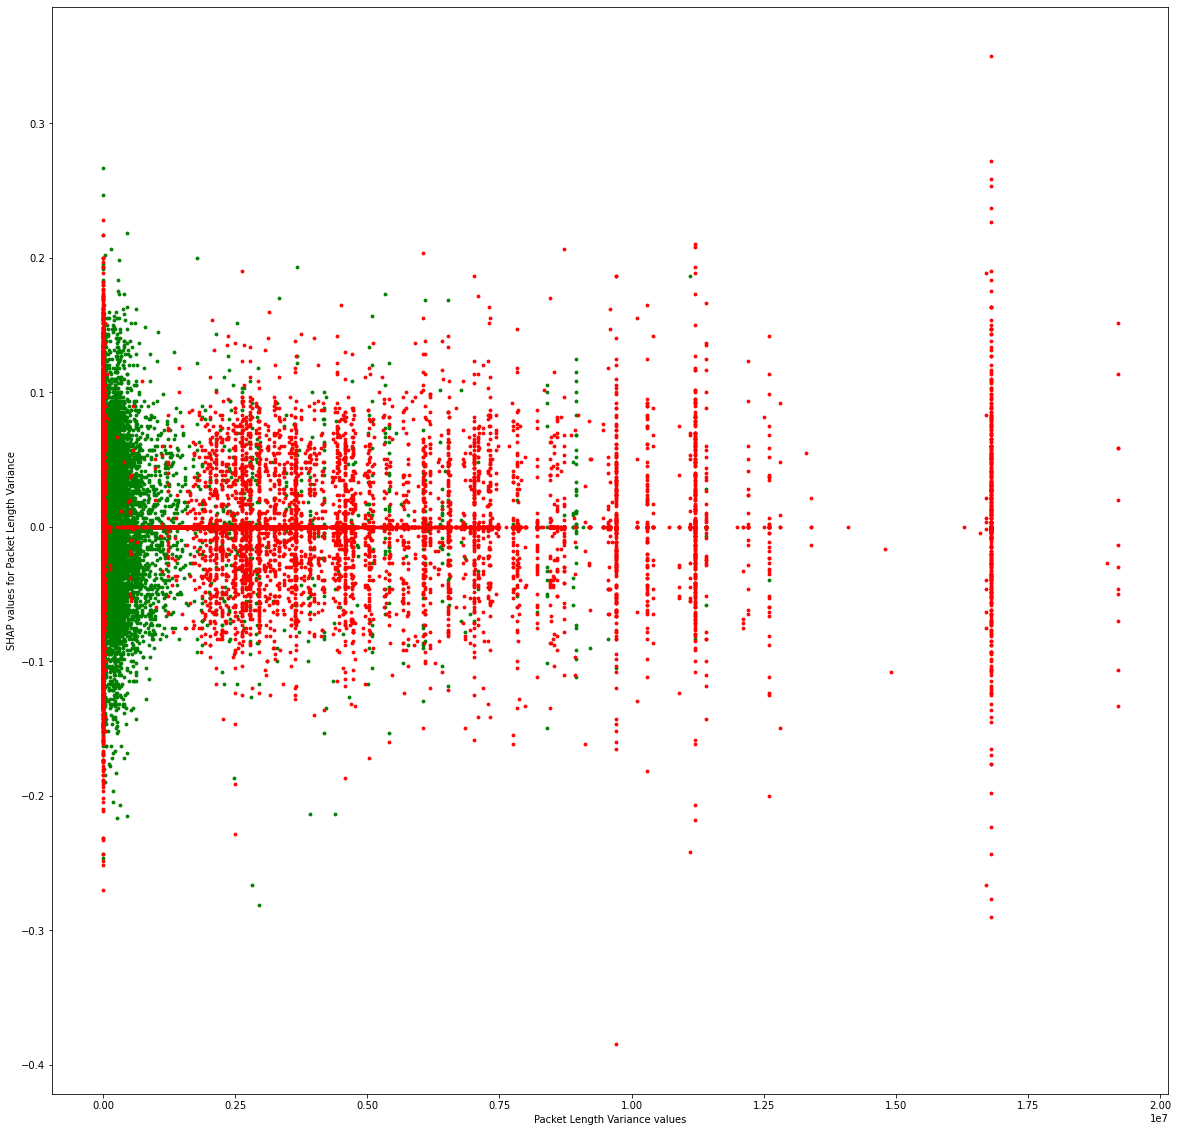

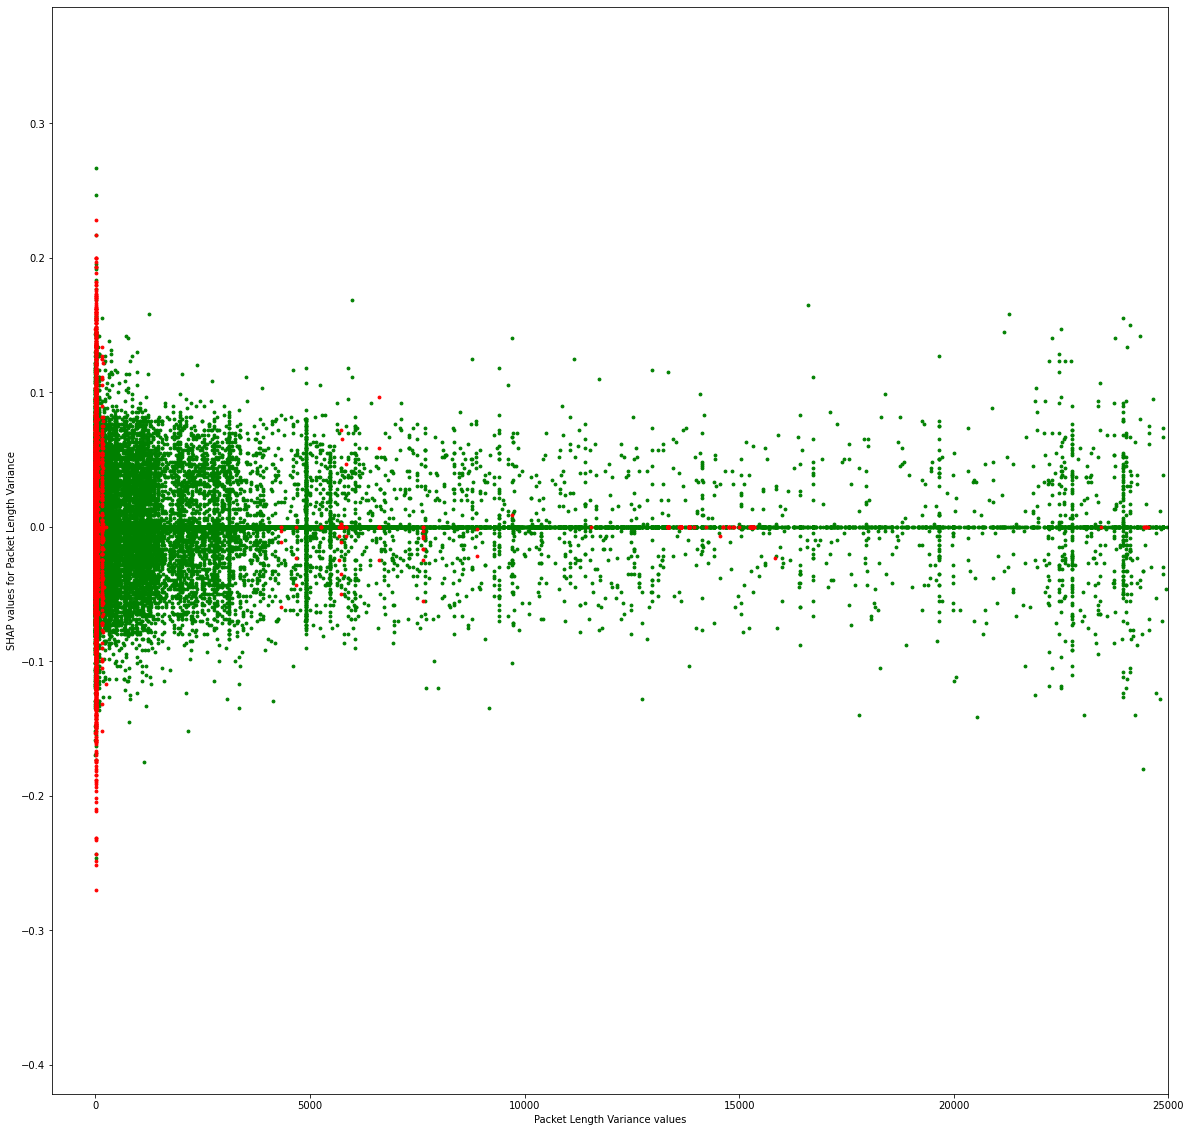

In [55]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.scatter(load_shap_values[benign_indx," Packet Length Variance"].data, load_shap_values[benign_indx," Packet Length Variance"].values, color = "g", marker = "o", s = 8)
ax.scatter(load_shap_values[attack_indx," Packet Length Variance"].data, load_shap_values[attack_indx," Packet Length Variance"].values, color = "r", marker = "o", s = 8)
ax.set_xlabel("Packet Length Variance values")
ax.set_ylabel("SHAP values for Packet Length Variance")

fig, ax = plt.subplots(figsize=(20, 20))
ax.scatter(load_shap_values[benign_indx," Packet Length Variance"].data, load_shap_values[benign_indx," Packet Length Variance"].values, color = "g", marker = "o", s = 8)
ax.scatter(load_shap_values[attack_indx," Packet Length Variance"].data, load_shap_values[attack_indx," Packet Length Variance"].values, color = "r", marker = "o", s = 8)
ax.set_xlabel("Packet Length Variance values")
ax.set_ylabel("SHAP values for Packet Length Variance")
ax.set_xlim([-1000, 25000])

### Avg Fwd Segment Size (15th in intrusions & 8th in benign)

(-10.0, 500.0)

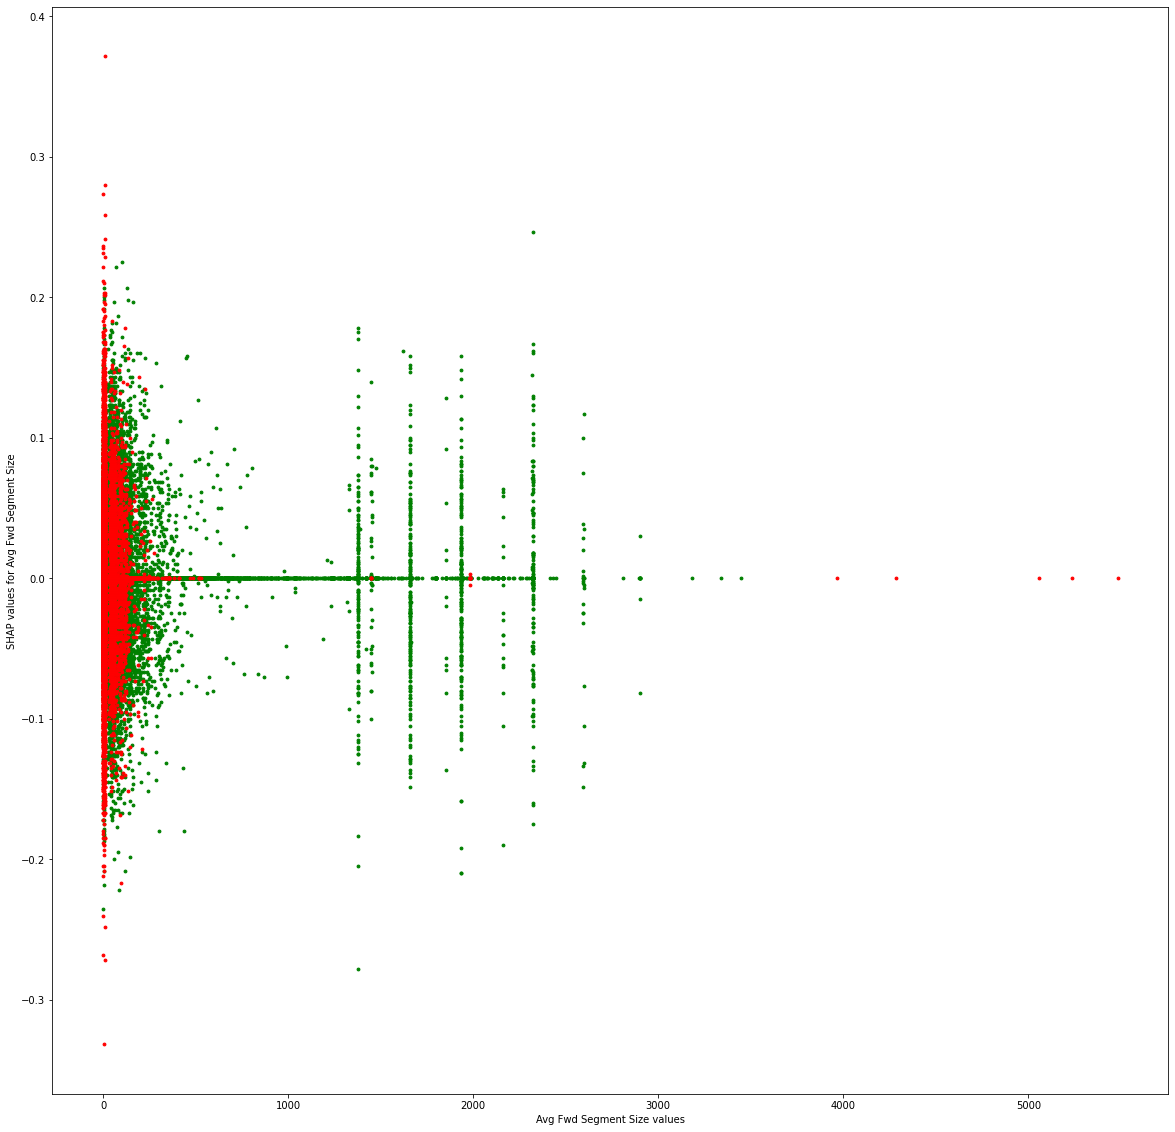

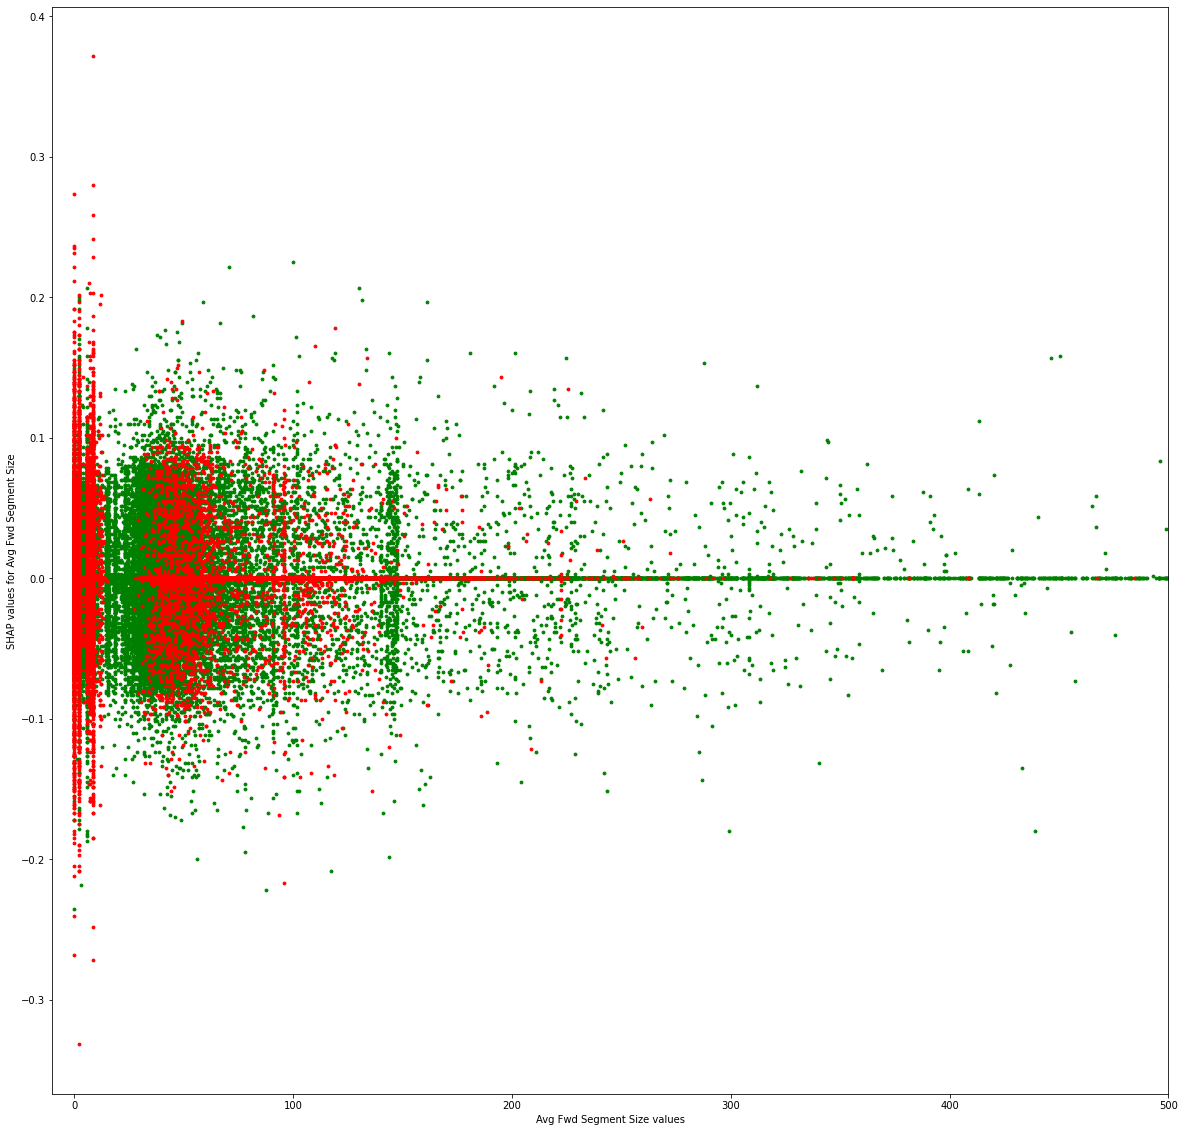

In [59]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.scatter(load_shap_values[benign_indx," Avg Fwd Segment Size"].data, load_shap_values[benign_indx," Avg Fwd Segment Size"].values, color = "g", marker = "o", s = 8)
ax.scatter(load_shap_values[attack_indx," Avg Fwd Segment Size"].data, load_shap_values[attack_indx," Avg Fwd Segment Size"].values, color = "r", marker = "o", s = 8)
ax.set_xlabel("Avg Fwd Segment Size values")
ax.set_ylabel("SHAP values for Avg Fwd Segment Size")

fig, ax = plt.subplots(figsize=(20, 20))
ax.scatter(load_shap_values[benign_indx," Avg Fwd Segment Size"].data, load_shap_values[benign_indx," Avg Fwd Segment Size"].values, color = "g", marker = "o", s = 8)
ax.scatter(load_shap_values[attack_indx," Avg Fwd Segment Size"].data, load_shap_values[attack_indx," Avg Fwd Segment Size"].values, color = "r", marker = "o", s = 8)
ax.set_xlabel("Avg Fwd Segment Size values")
ax.set_ylabel("SHAP values for Avg Fwd Segment Size")
ax.set_xlim([-10, 500])

### Fwd Packet Length Mean (17th in intrusions & 10th in benign)

(-10.0, 500.0)

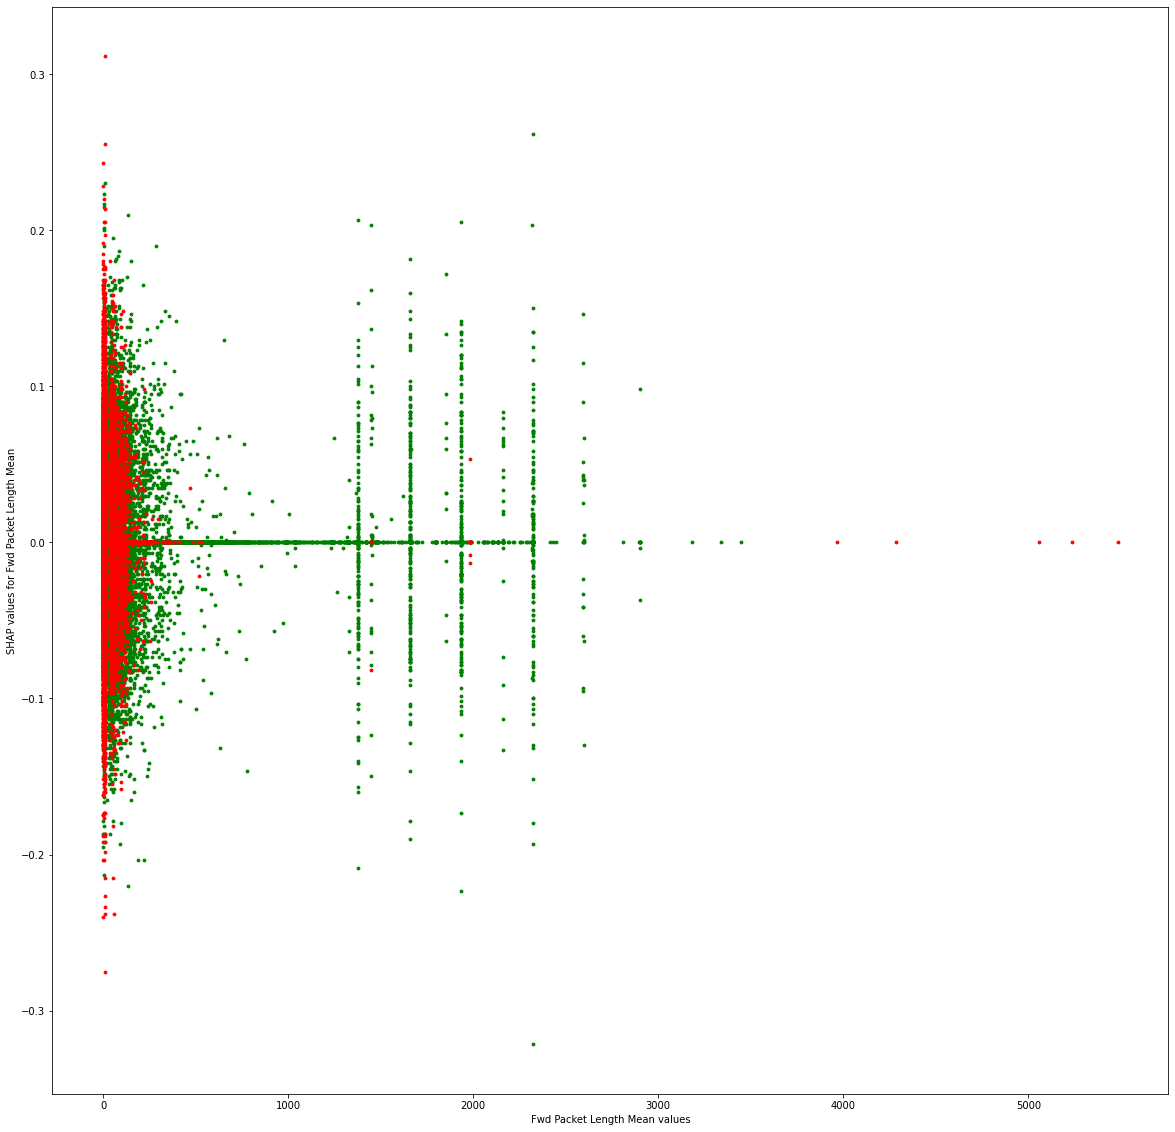

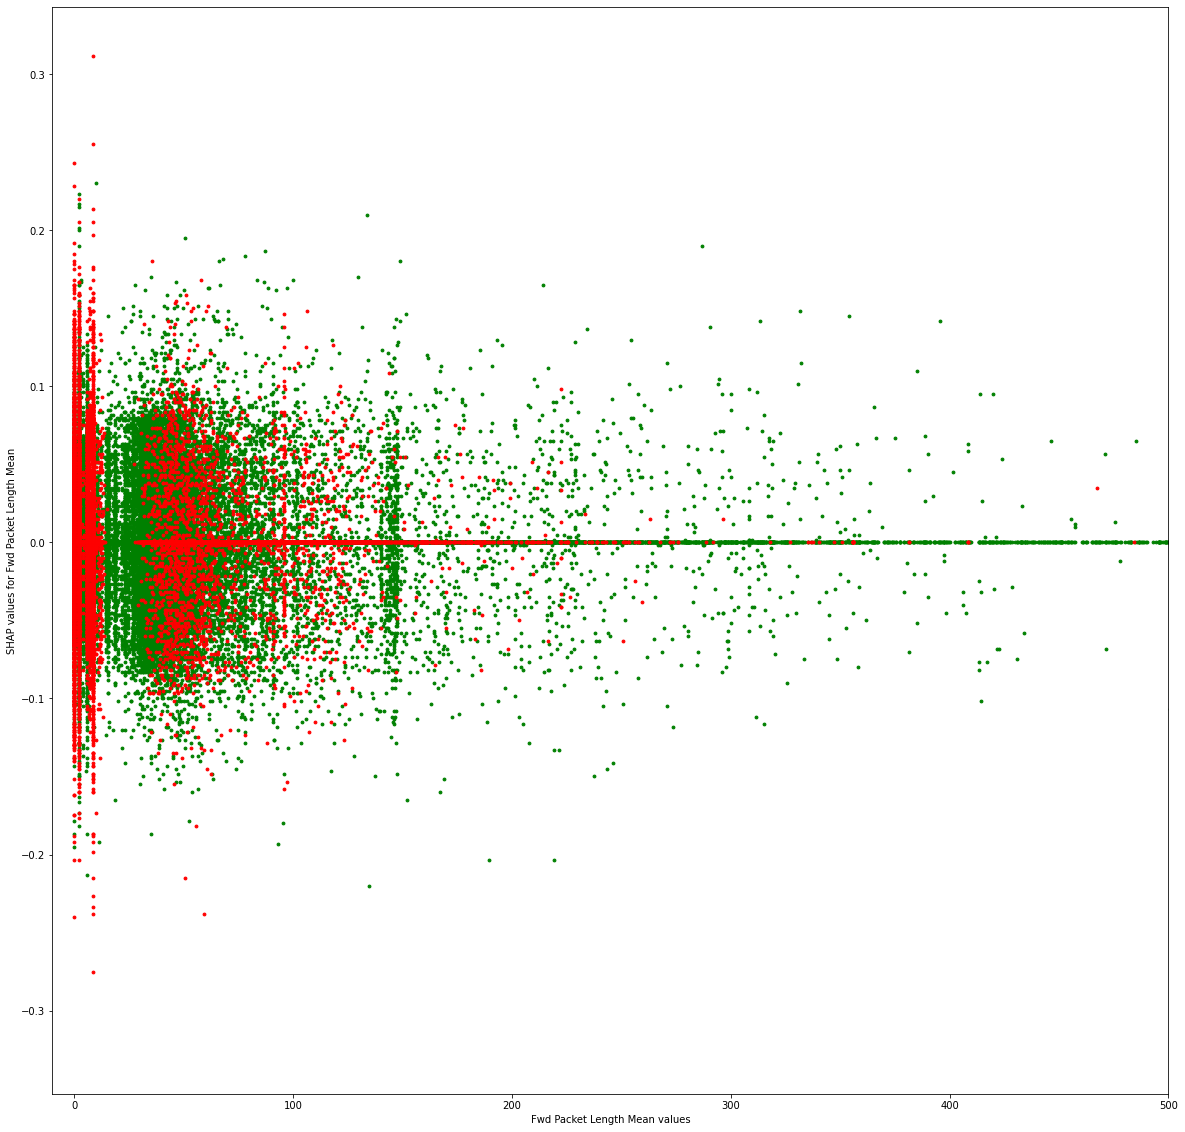

In [60]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.scatter(load_shap_values[benign_indx," Fwd Packet Length Mean"].data, load_shap_values[benign_indx," Fwd Packet Length Mean"].values, color = "g", marker = "o", s = 8)
ax.scatter(load_shap_values[attack_indx," Fwd Packet Length Mean"].data, load_shap_values[attack_indx," Fwd Packet Length Mean"].values, color = "r", marker = "o", s = 8)
ax.set_xlabel("Fwd Packet Length Mean values")
ax.set_ylabel("SHAP values for Fwd Packet Length Mean")

fig, ax = plt.subplots(figsize=(20, 20))
ax.scatter(load_shap_values[benign_indx," Fwd Packet Length Mean"].data, load_shap_values[benign_indx," Fwd Packet Length Mean"].values, color = "g", marker = "o", s = 8)
ax.scatter(load_shap_values[attack_indx," Fwd Packet Length Mean"].data, load_shap_values[attack_indx," Fwd Packet Length Mean"].values, color = "r", marker = "o", s = 8)
ax.set_xlabel("Fwd Packet Length Mean values")
ax.set_ylabel("SHAP values for Fwd Packet Length Mean")
ax.set_xlim([-10, 500])

# --------------------------------------------------------------------------------------------------------------

## Pattern Discovery between edge features (using Decision Trees)

In [2]:
# DO NOT DELETE !!!!!

# This is a proof that : The array returned by shap_values is the parallel to the data array we explained the predictions on,
# meaning it is the same shape as the data matrix you apply the model to.
# That means the names of the features for each column are the same as for your data matrix

print(X_test.columns)
print("++++++++++++++++++++++++")
print(load_shap_values[:, 1])
print("++++++++++++++++++++++++")
print(load_shap_values[:, " Subflow Bwd Bytes"])

print()
print("Comparison results : ")
print((load_shap_values[:, 1].values == load_shap_values[:, " Subflow Bwd Bytes"].values).all())
print((load_shap_values[:, 1].data == load_shap_values[:, " Subflow Bwd Bytes"].data).all())
print((load_shap_values[:, 1].base_values == load_shap_values[:, " Subflow Bwd Bytes"].base_values).all())

print()
print()
print("******************")

# And this is a proof that .data of shap represent the edge features in the same order of the X_test
print(load_shap_values.data[1])
print()
print(X_test.loc[1])

Index([' Fwd Packet Length Std', ' Subflow Bwd Bytes',
       ' Total Length of Bwd Packets', 'Idle Mean', ' PSH Flag Count',
       'Init_Win_bytes_forward', 'Total Length of Fwd Packets',
       ' Packet Length Variance', ' Total Backward Packets', ' Bwd Packets/s',
       ' Bwd Packet Length Std', 'Bwd IAT Total', ' Fwd Avg Packets/Bulk',
       ' Bwd Packet Length Min', ' Flow Duration', ' Flow IAT Max',
       ' SYN Flag Count', ' Active Min', ' ACK Flag Count', ' RST Flag Count',
       ' Packet Length Std', ' Bwd IAT Min', ' Subflow Bwd Packets',
       ' Active Std', ' Idle Min', ' Idle Std', ' Fwd URG Flags',
       ' Fwd Packet Length Min', ' Fwd IAT Max', 'Fwd IAT Total',
       ' Total Fwd Packets', 'Subflow Fwd Packets', ' Fwd IAT Mean',
       ' Bwd Header Length', ' Active Max', ' Idle Max', ' URG Flag Count',
       ' Fwd Header Length', ' Bwd IAT Std', 'Fwd Packets/s', ' Bwd PSH Flags',
       ' Protocol', ' Bwd Avg Bytes/Bulk', ' Bwd Packet Length Mean',
       'Bwd A

In [3]:
dt_df = pd.DataFrame(columns = X_test.columns)
print(dt_df.columns)

# Since we want to study pattern recognition between edge features
# We don't insert Source_IP Destination_IP and label shap values 

print(len(load_shap_values.values))
print(load_shap_values.values[0])

for i in range(len(load_shap_values.values)):
    if (i % 10000 == 0):
        print(i)
    dt_df.loc[-1] = load_shap_values.values[i]  # adding a row
    dt_df.index = dt_df.index + 1  # shifting index

print(dt_df)

Index([' Fwd Packet Length Std', ' Subflow Bwd Bytes',
       ' Total Length of Bwd Packets', 'Idle Mean', ' PSH Flag Count',
       'Init_Win_bytes_forward', 'Total Length of Fwd Packets',
       ' Packet Length Variance', ' Total Backward Packets', ' Bwd Packets/s',
       ' Bwd Packet Length Std', 'Bwd IAT Total', ' Fwd Avg Packets/Bulk',
       ' Bwd Packet Length Min', ' Flow Duration', ' Flow IAT Max',
       ' SYN Flag Count', ' Active Min', ' ACK Flag Count', ' RST Flag Count',
       ' Packet Length Std', ' Bwd IAT Min', ' Subflow Bwd Packets',
       ' Active Std', ' Idle Min', ' Idle Std', ' Fwd URG Flags',
       ' Fwd Packet Length Min', ' Fwd IAT Max', 'Fwd IAT Total',
       ' Total Fwd Packets', 'Subflow Fwd Packets', ' Fwd IAT Mean',
       ' Bwd Header Length', ' Active Max', ' Idle Max', ' URG Flag Count',
       ' Fwd Header Length', ' Bwd IAT Std', 'Fwd Packets/s', ' Bwd PSH Flags',
       ' Protocol', ' Bwd Avg Bytes/Bulk', ' Bwd Packet Length Mean',
       'Bwd A

In [4]:
print(dt_df)

         Fwd Packet Length Std   Subflow Bwd Bytes  \
138049                0.000000               0.000   
138048                0.000000               0.000   
138047                0.051667               0.000   
138046                0.000000               0.000   
138045               -0.040000               0.000   
...                        ...                 ...   
4                     0.000000               0.000   
3                     0.000000               0.000   
2                     0.005000              -0.015   
1                     0.000000               0.000   
0                     0.000000               0.000   

         Total Length of Bwd Packets  Idle Mean   PSH Flag Count  \
138049                      0.000000   0.000000         0.000000   
138048                      0.000000   0.000000         0.000000   
138047                      0.000000   0.000000         0.033333   
138046                      0.006667   0.000000         0.000000   
138045     

In [5]:
dt_df_saved = dt_df

In [6]:
dt_df = dt_df.drop(' Source IP', axis=1)
dt_df = dt_df.drop(' Destination IP', axis=1)
dt_df = dt_df.drop('label', axis=1)
print(len(dt_df.columns))

76


In [7]:
dt_df.insert(loc = 0, column = 'label', value = X_test["label"])
print(len(dt_df.columns))
print(dt_df['label'])

77
138049    0.0
138048    0.0
138047    0.0
138046    0.0
138045    0.0
         ... 
4         0.0
3         0.0
2         0.0
1         0.0
0         1.0
Name: label, Length: 138050, dtype: float64


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

cols = list(set(list(dt_df.columns )) - set(list(['label'])) )

x_dt_df = dt_df[cols]
y_dt_df = dt_df['label']

X_train, X_test, y_train, y_test = train_test_split(x_dt_df, y_dt_df, test_size=0.3, random_state=123, stratify= y_dt_df)

dt_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 14, min_samples_leaf = 5)
# Performing training
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=14, min_samples_leaf=5,
                       random_state=100)

In [88]:
# Performing testing
pred = dt_entropy.predict(X_test)

import sklearn

print('Metrics : ')
print("Accuracy : ", sklearn.metrics.accuracy_score(y_test, pred))
print("Precision : ", sklearn.metrics.precision_score(y_test, pred, labels = [0,1]))
print("Recall : ", sklearn.metrics.recall_score(y_test, pred, labels = [0,1]))
print("f1_score : ", sklearn.metrics.f1_score(y_test, pred, labels = [0,1]))

Metrics : 
Accuracy :  0.7544609441023784
Precision :  0.2100456621004566
Recall :  0.004580760804620594
f1_score :  0.008965987720495078


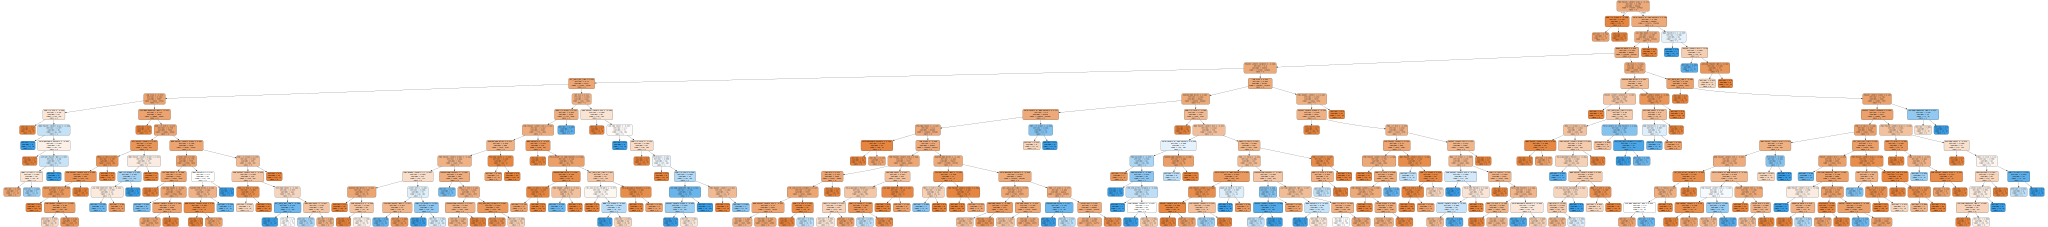

In [78]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(dt_entropy, out_file = None, feature_names = cols, class_names = ["0", "1"], filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data, format="png")
graph.render("/home/ahmed/GNN-Based-ANIDS/GNN-Based-ANIDS/jupyter_notebooks/XAI/SHAP/DT/dt_entropy_depth14")
graph

In [86]:
print("nb attacks (1) :", len(attack_indx))
print("nb benign (0) :", len(benign_indx))
print()
print("nb attacks (1) in X_train :", len(y_train.loc[y_train == 1.0]))
print("nb benign (0) in X_train :", len(y_train.loc[y_train == 0.0]))

nb attacks (1) : 33473
nb benign (0) : 104577

nb attacks (1) in X_train : 23431
nb benign (0) in X_train : 73204
